In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

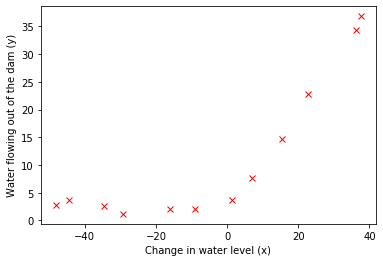

In [2]:
mat_data=sio.loadmat('.\machine-learning-exercise-master\coursera-machine-learning-python\ex5\ex5data1.mat')
X=mat_data['X']
y=mat_data['y'].ravel()
X_test=mat_data['Xtest']
y_test=mat_data['ytest'].ravel()
X_val=mat_data['Xval']
y_val=mat_data['yval'].ravel()
m=X.shape[0]
m_val=X_val.shape[0]
m_test=X_test.shape[0]
plt.figure()
plt.plot(X,y,linestyle='',marker='x',color='r')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

In [6]:
#带正则项的线性回归损失函数
def linear_cost_function(theta,X,y,l):
    m=X.shape[0]
    J=1.0/(2*m)*np.sum(np.square(X.dot(theta)-y))+1.0*l/(2*m)*np.sum(np.square(theta[1:]))
    mask=np.eye(len(theta))
    mask[0,0]=0
    grad=1.0/m*X.T.dot(X.dot(theta)-y)+1.0*l/m*(mask.dot(theta))
    return J,grad

In [8]:
#利用原始数据计算初始参数[1，1]的损失函数
theta=np.array([1,1])
J,_=linear_cost_function(theta,np.hstack((np.ones((m,1)),X)),y,1)
print('参数为[1,1]的损失函数值:',J)

参数为[1,1]的损失函数值: 303.9931922202643


In [9]:
#利用原始数据计算初始参数[1，1]的梯度
theta=np.array([1,1])
_,grad=linear_cost_function(theta,np.hstack((np.ones((m,1)),X)),y,1)
print('参数为[1,1]的梯度值:',grad)

参数为[1,1]的梯度值: [-15.30301567 598.25074417]


In [11]:
#训练线性回归
import scipy.optimize as opt
def train_linear_reg(X,y,l,iteration=200):
    m,n=X.shape
    initial_theta=np.zeros((n,1))
    result=opt.minimize(fun=linear_cost_function,x0=initial_theta,args=(X,y,l),method='TNC',jac=True,options={'maxiter':iteration})
    return result.x

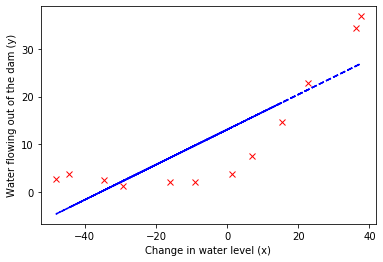

In [12]:
l=0.0
theta=train_linear_reg(np.hstack((np.ones((m,1)),X)),y,l)
pred=np.hstack((np.ones((m,1)),X)).dot(theta)
plt.figure()
plt.plot(X,y,linestyle='',marker='x',color='r')
plt.plot(X,pred,linestyle='--',marker='',color='b')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

In [13]:
#计算训练误差
def learning_curve(X,y,X_val,y_val,l):
    m=X.shape[0]
    m_val=X_val.shape[0]
    error_train=np.zeros(m)
    error_val=np.zeros(m)
    for i in range(1,m+1):
        theta=train_linear_reg(X[:i,],y[:i,],l)
        error_train[i-1]=1.0/(2*i)*np.sum(np.square(X[:i,].dot(theta)-y[:i,]))
        error_val[i-1]=1.0/(2*m_val)*np.sum(np.square(X_val.dot(theta)-y_val))
    return error_train,error_val

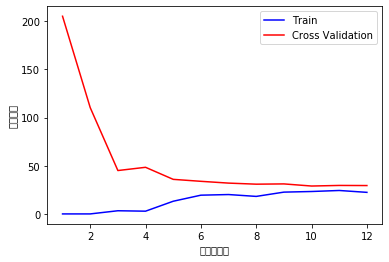

训练样本/训练平方误差/交叉验证误差
1                   0.00000000    205.12109571
2                   0.00000000    110.30264058
3                   3.28659505    45.01023132
4                   2.84267769    48.36891058
5                   13.15404881   35.86516475
6                   19.44396251   33.82996142
7                   20.09852166   31.97098563
8                   18.17285870   30.86244626
9                   22.60940542   31.13599787
10                  23.26146159   28.93620747
11                  24.31724959   29.55143162
12                  22.37390650   29.43381813


In [14]:
#绘制学习曲线
l=0.0
error_train,error_val=learning_curve(np.hstack((np.ones((m,1)),X)),y,np.hstack((np.ones((m_val,1)),X_val)),y_val,l)
plt.figure()
plt.plot(range(1,m+1),error_train,color='b',label='Train')
plt.plot(range(1,m+1),error_val,color='r',label='Cross Validation')
plt.legend(loc='upper right')
plt.xlabel('训练样本量')
plt.ylabel('平方误差')
plt.show()
print('训练样本/训练平方误差/交叉验证误差')
for i in range(m):
    print('{0:<19} {1:<13.8f} {2:<.8f}'.format(i+1,error_train[i],error_val[i]))

In [15]:
#多项式回归
def poly_features(X,p):
    X_poly=np.zeros((len(X),p))
    for i in range(p):
        X_poly[:,i]=np.power(X,i+1).ravel()
    return X_poly

In [17]:
#特征标准化
def feature_normalize(X,mu=None,sigma=None):
    if mu is None:
        mu=np.mean(X,axis=0)
    if sigma is None:
        sigma=np.std(X,ddof=1,axis=0)
    X_norm=(X-mu)/sigma
    return X_norm,mu,sigma

In [20]:
#增加特征，拟合多项式回归
p=8
X_poly=poly_features(X,p)
X_poly,mu,sigma=feature_normalize(X_poly)
X_poly=np.hstack((np.ones((m,1)),X_poly))
X_poly_test=poly_features(X_test,p)
X_poly_test,dummy_mu,dummy_sigma=feature_normalize(X_poly_test,mu,sigma)
X_poly_test=np.hstack((np.ones((m_test,1)),X_poly_test))
X_poly_val=poly_features(X_val,p)
X_poly_val,dummy_mu,dummy_sigma=feature_normalize(X_poly_val,mu,sigma)
X_poly_val=np.hstack((np.ones((m_val,1)),X_poly_val))
print('Normalized Training Example 1:')
print(X_poly[0,:])

Normalized Training Example 1:
[ 1.         -0.36214078 -0.75508669  0.18222588 -0.70618991  0.30661792
 -0.59087767  0.3445158  -0.50848117]


In [24]:
#学习曲线--多项式回归
def plot_fit(min_x,max_x,mu,sigma,theta,p):
    x=np.arange(min_x-15,max_x+25,0.05)
    X_poly=poly_features(x,p)
    X_poly,dummy_mu,dummy_sigma=feature_normalize(X_poly,mu,sigma)
    X_poly=np.hstack((np.ones((X_poly.shape[0],1)),X_poly))
    plt.plot(x,X_poly.dot(theta),linestyle='--',marker='',color='b')

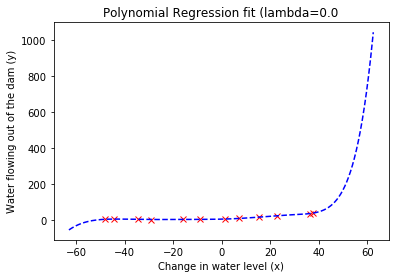

In [25]:
l=0.0
theta=train_linear_reg(X_poly,y,l,iteration=500)
plt.figure()
plt.plot(X,y,linestyle='',marker='x',color='r')
plot_fit(np.min(X),np.max(X),mu,sigma,theta,p)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial Regression fit (lambda={}'.format(l))
plt.show()

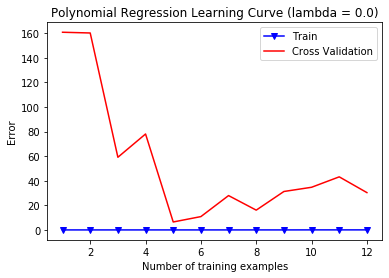

In [26]:
#绘制多项式回归的学习曲线
error_train,error_val=learning_curve(X_poly,y,X_poly_val,y_val,l)
plt.figure()
plt.plot(range(1,m+1),error_train,color='b',marker='v',label='Train')
plt.plot(range(1,m+1),error_val,color='r',label='Cross Validation')
plt.legend(loc='upper right')
plt.title('Polynomial Regression Learning Curve (lambda = {})'.format(l))
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.show()

In [27]:
#验证选择参数
def validation_curve(x,y,x_val,y_val):
    lambda_vec=np.array([0,0.001,0.003,0.01,0.03,0.1,0.3,1,3,10])
    error_train=np.zeros(len(lambda_vec))
    error_val=np.zeros(len(lambda_vec))
    m=x.shape[0]
    m_val=x_val.shape[0]
    for i in range(len(lambda_vec)):
        l=lambda_vec[i]
        theta=train_linear_reg(x,y,l)
        error_train[i]=1.0/(2*m)*np.sum(np.square(x.dot(theta)-y))
        error_val[i]=1.0/(2*m_val)*np.sum(np.square(x_val.dot(theta)-y_val))
    return lambda_vec, error_train, error_val

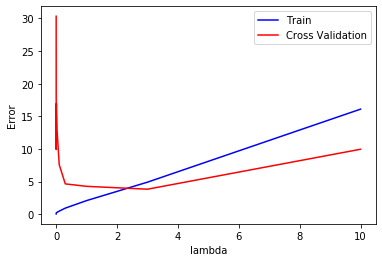

#lambda/Train Error/Validation Error
0.0      0.03307598    30.33631976
0.001    0.11309929    9.90332880
0.003    0.17100665    16.27706677
0.01     0.22148498    16.95057737
0.03     0.28186059    12.82876264
0.1      0.45931813    7.58701373
0.3      0.92177722    4.63674719
1.0      2.07619961    4.26060193
3.0      4.90137861    3.82290647
10.0     16.09227271   9.94555422


In [29]:
lambda_vec,error_train,error_val=validation_curve(X_poly,y,X_poly_val,y_val)
plt.figure()
plt.plot(lambda_vec,error_train,color='b',label='Train')
plt.plot(lambda_vec,error_val,color='r',label='Cross Validation')
plt.legend(loc='upper right')
plt.xlabel('lambda')
plt.ylabel('Error')
plt.show()
print('#lambda/Train Error/Validation Error')
for i in range(len(lambda_vec)):
    print("{0:<8} {1:<13.8f} {2:<.8f}".format(lambda_vec[i],error_train[i],error_val[i]))